# House price prediction

In [100]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [101]:
data = pd.read_csv('../dataset/house_pricing.csv')

In [102]:
data.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [104]:
data.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [105]:
data=data.drop('Id',axis=1)
data

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1062,5,1,2,1903,Rural,Poor,No,476925
1998,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [106]:
data.corr(numeric_only=True)

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
Area,1.000000,0.047523,0.021881,0.017749,-0.011609,0.001542
Bedrooms,0.047523,1.000000,-0.011990,0.010435,-0.014125,-0.003471
Bathrooms,0.021881,-0.011990,1.000000,0.029089,-0.000839,-0.015737
Floors,0.017749,0.010435,0.029089,1.000000,-0.006474,0.055890
YearBuilt,-0.011609,-0.014125,-0.000839,-0.006474,1.000000,0.004845
Price,0.001542,-0.003471,-0.015737,0.055890,0.004845,1.000000


In [107]:
x = data.drop("Price",axis=1)

y = data['Price']

x = pd.get_dummies(x, columns=["Location", "Condition", "Garage"], drop_first=True)


In [108]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [109]:
scaler = StandardScaler()

# fit training data
x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.fit_transform(x_test)

In [110]:
model = LinearRegression()

model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)

In [112]:
result = pd.DataFrame({
    "Actual Price": y_test.values[:10],
    "Predicted Price": y_pred[:10]
})

print(result)


   Actual Price  Predicted Price
0        514764    504020.782917
1        694256    537813.766360
2         66375    480818.766618
3        650243    544982.105444
4        223285    563562.186967
5        468127    525828.847937
6        513002    516209.519043
7        911525    559592.405964
8        723265    551902.821876
9        339416    563875.666104


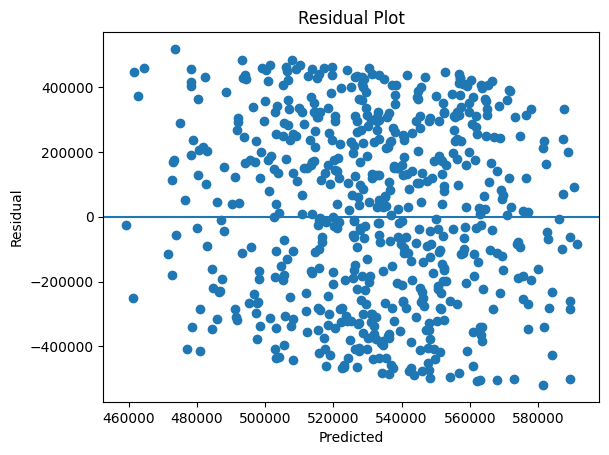

In [113]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()



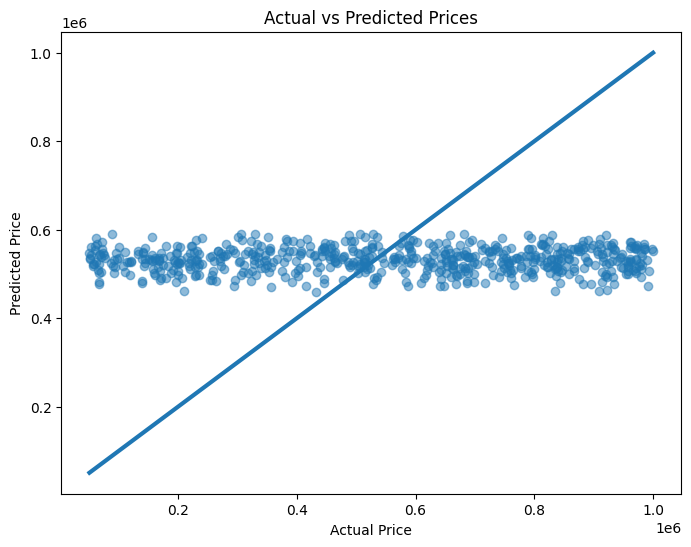

In [115]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 
         linewidth=3)
plt.show()


<Axes: ylabel='count'>

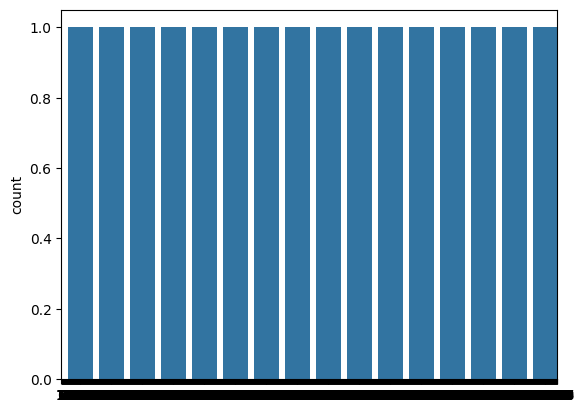

In [123]:
import seaborn as sns

sns.countplot(data['Bathrooms'])

<Axes: ylabel='count'>

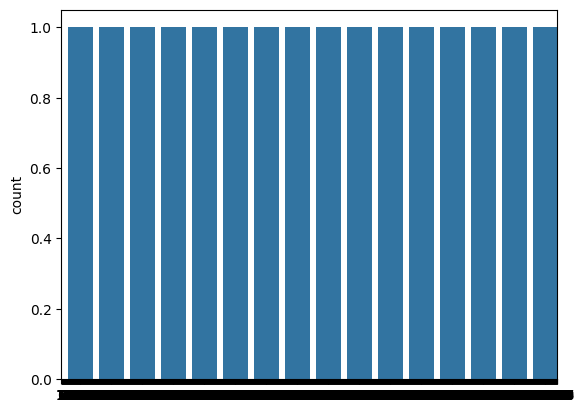

In [124]:
sns.countplot(data['Price'])

<Axes: ylabel='count'>

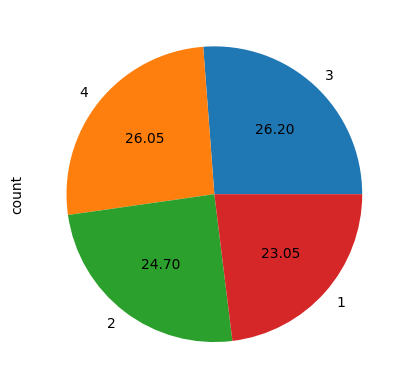

In [126]:
data['Bathrooms'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

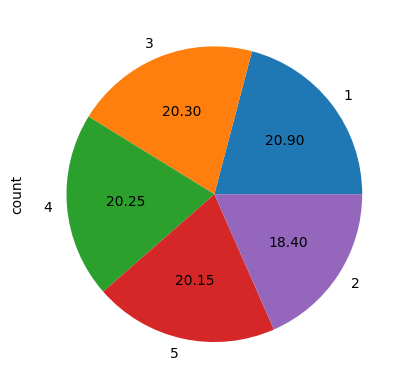

In [127]:
data['Bedrooms'].value_counts().plot(kind='pie',autopct='%.2f')

(array([182., 200., 206., 184., 204., 179., 224., 221., 192., 208.]),
 array([ 501. ,  950.8, 1400.6, 1850.4, 2300.2, 2750. , 3199.8, 3649.6,
        4099.4, 4549.2, 4999. ]),
 <BarContainer object of 10 artists>)

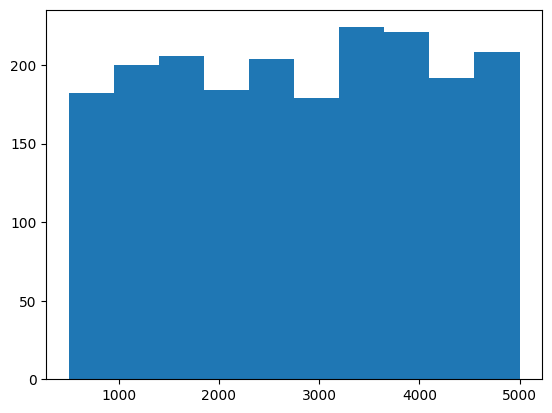

In [130]:
import matplotlib.pyplot as plt 


plt.hist(data['Area'])